<a href="https://colab.research.google.com/github/suryareddy1376/DeepLearning/blob/main/fashion_mnist_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install tensorflow

In [55]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
keras.utils.set_random_seed(42)

In [57]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [58]:
x_train.shape
y_train.shape


(60000,)

In [59]:
labels = ["T-shirt/top",
          "Trouser",
          "Pullover",
          "Dress",
          "Coat",
          "Sandal",
          "Shirt",
          "Sneaker",
          "Bag",
          "Ankle boot"]



In [60]:
labels[0]

labels[y_train[0]]



'Ankle boot'

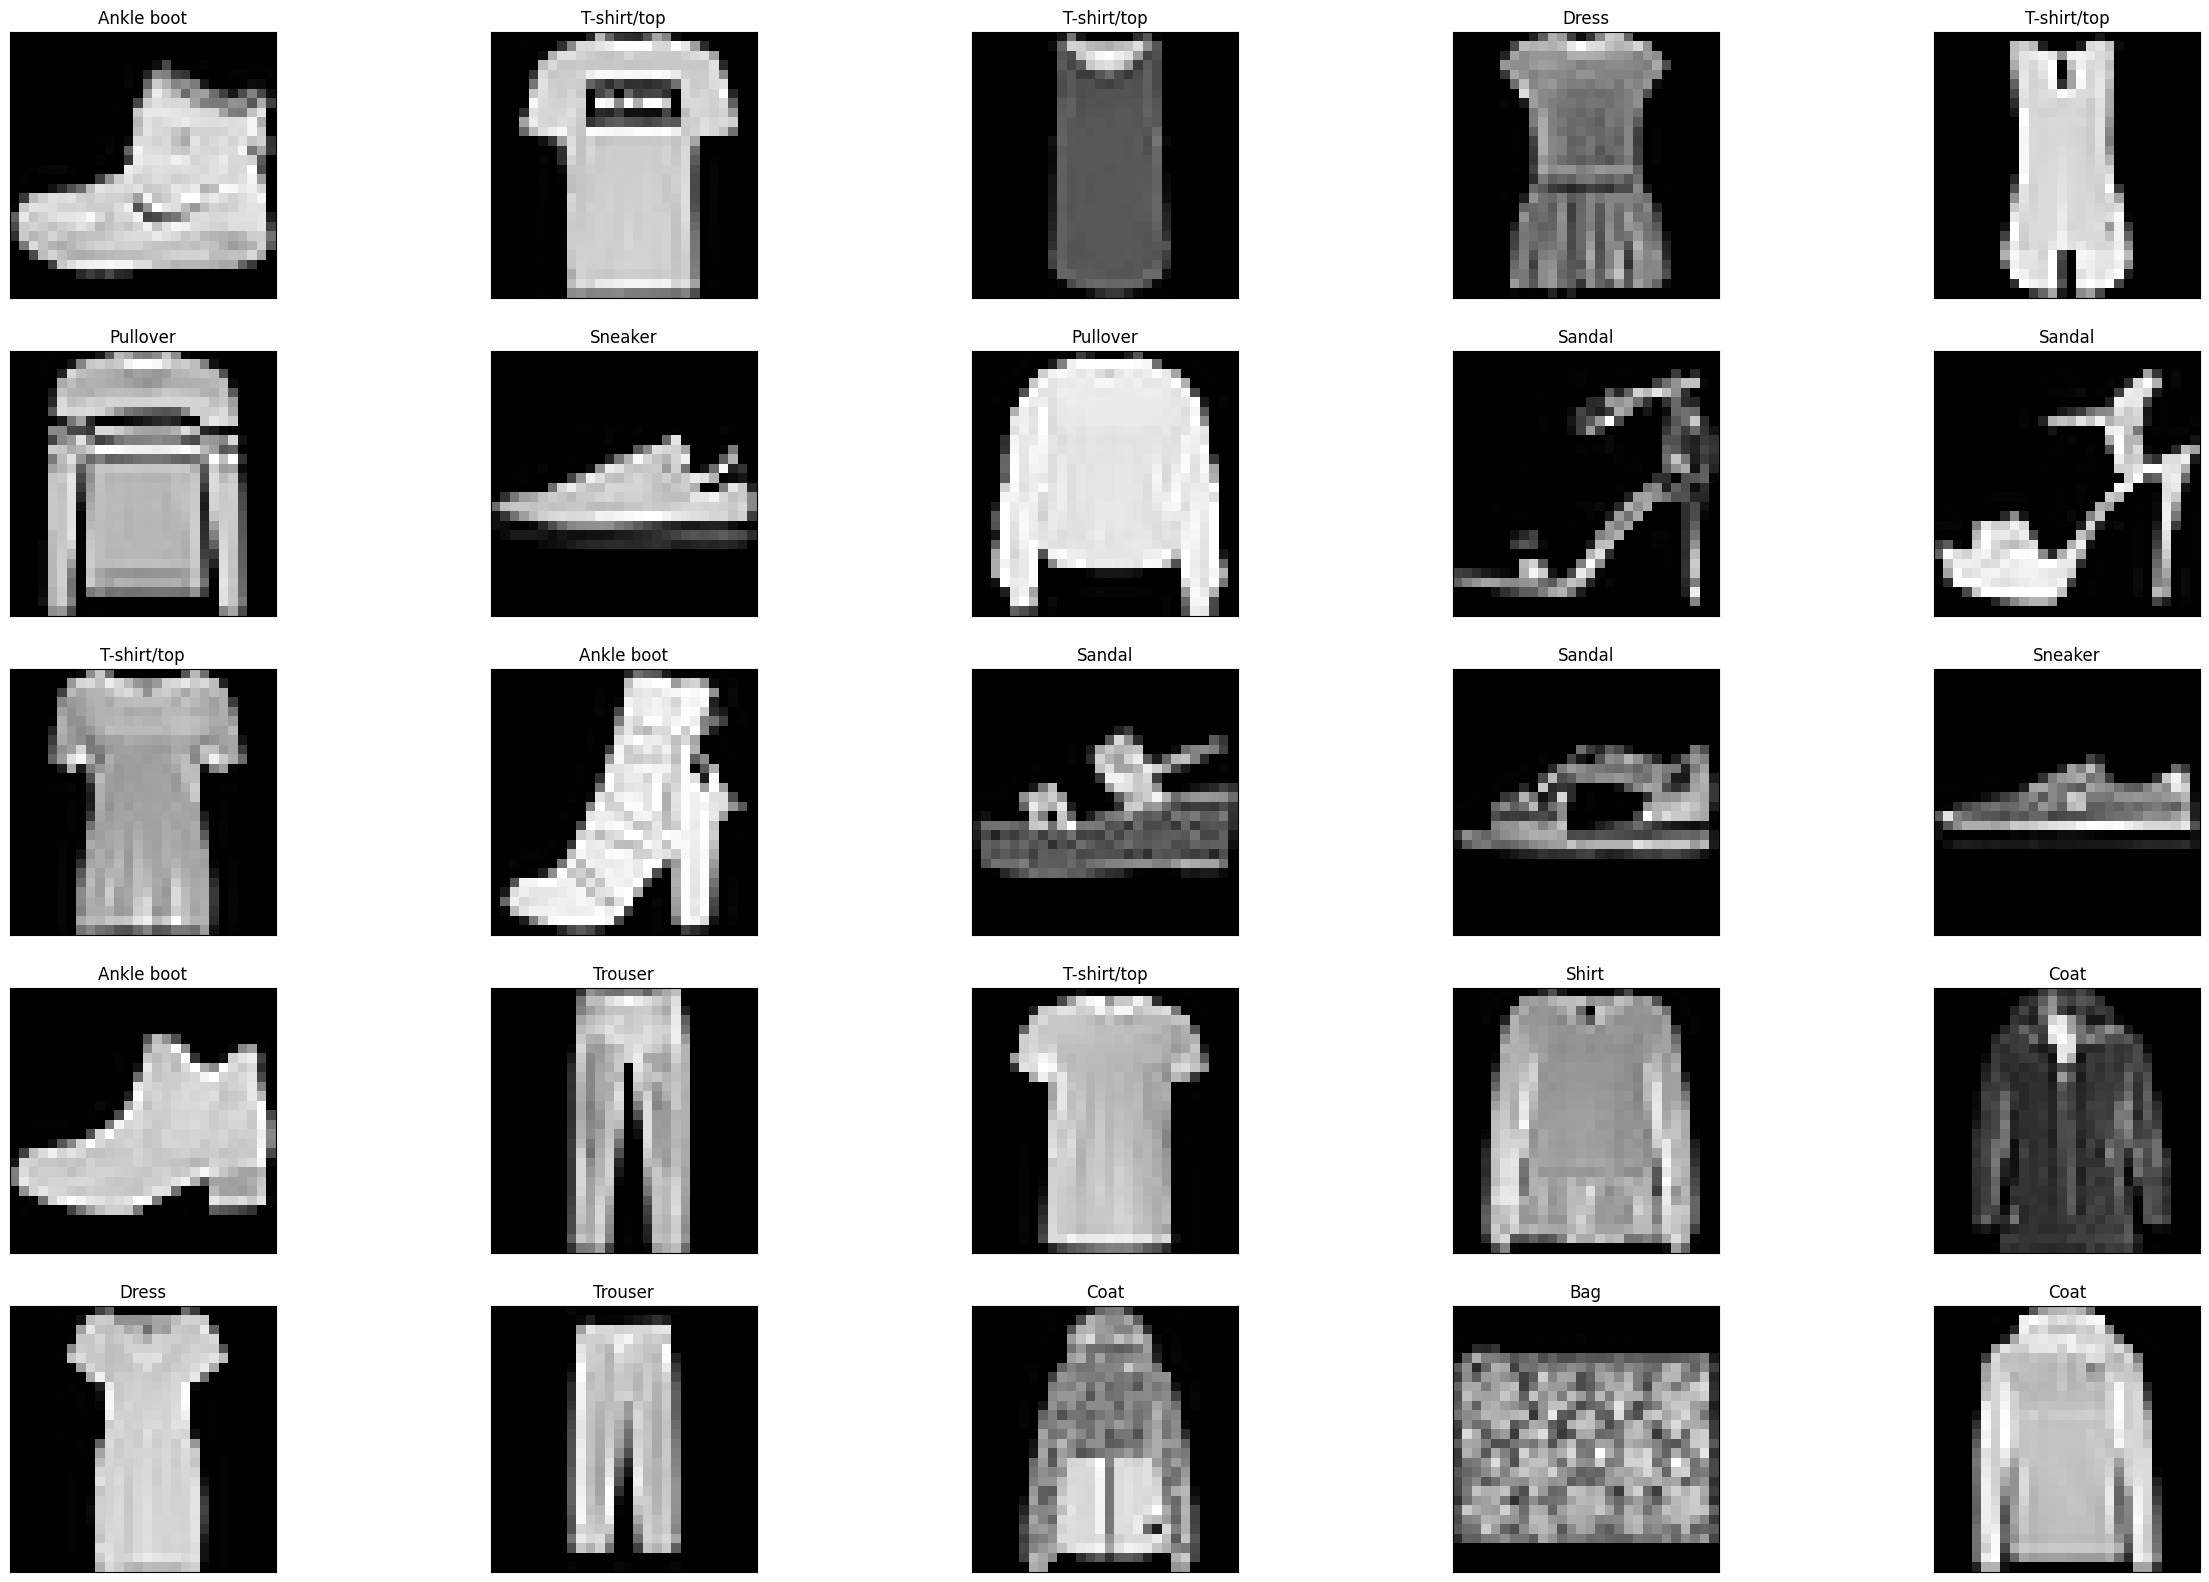

In [61]:
fig, ax = plt.subplots(5, 5, figsize=(30, 20))
for i in range(25):
  axc = ax[i//5, i%5]
  axc.imshow(x_train[i],cmap="gray")
  axc.set_title(f"{labels[y_train[i]]}")
  axc.set_xticks([])
  axc.set_yticks([])

In [62]:
x_train = x_train/255
x_test = x_test/255

##One Dence Layer

In [63]:
input = keras.Input(shape=(28,28))
h = keras.layers.Flatten()(input)
h = keras.layers.Dense(256,activation="relu",name="Hidden")(h)
output = keras.layers.Dense(10,activation="softmax",name="Output")(h)
model = keras.Model(input,output)

In [64]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden (Dense)                  │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

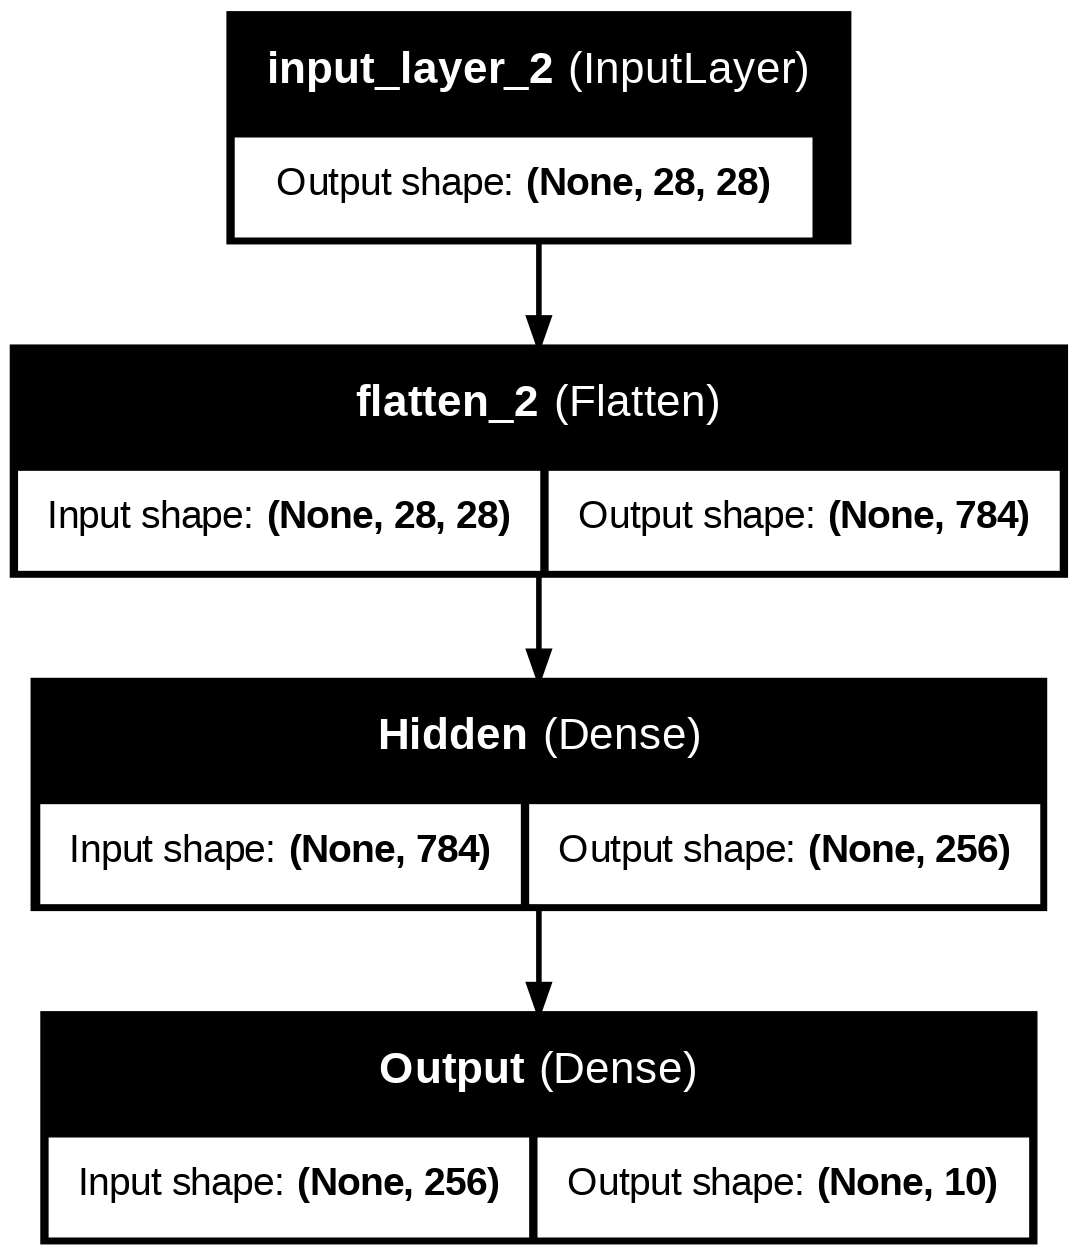

In [66]:
keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [67]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [68]:
history = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7767 - loss: 0.6319 - val_accuracy: 0.8524 - val_loss: 0.4120
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8617 - loss: 0.3856 - val_accuracy: 0.8627 - val_loss: 0.3762
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8779 - loss: 0.3390 - val_accuracy: 0.8678 - val_loss: 0.3666
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8872 - loss: 0.3115 - val_accuracy: 0.8737 - val_loss: 0.3561
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8949 - loss: 0.2903 - val_accuracy: 0.8782 - val_loss: 0.3443
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9000 - loss: 0.2728 - val_accuracy: 0.8766 - val_loss: 0.3496
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9040 - loss: 0.2585 - val_accuracy: 0.8768 - val_loss: 0.3487
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9083 - loss: 0.2462 

In [69]:
def plot_loss_curves(history):
  plt.clf()
  history_dict = history.history
  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]
  epochs = range(1,len(loss_values)+1)
  plt.plot(epochs,loss_values,"bo",label = "Training Loss")
  plt.plot(epochs,val_loss_values,"r",label = "Validation Loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()

In [70]:
def plot_acc_curves(history):
  plt.clf()
  history_dict = history.history
  acc = history_dict['accuracy']
  val_accuracy = history_dict['val_accuracy']
  epochs = range(1,len(acc)+1)
  plt.plot(epochs,acc,"bo",label = "Training Accuracy")
  plt.plot(epochs,val_accuracy,"r",label = "Validation Accuracy")
  plt.title("Training and Validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()


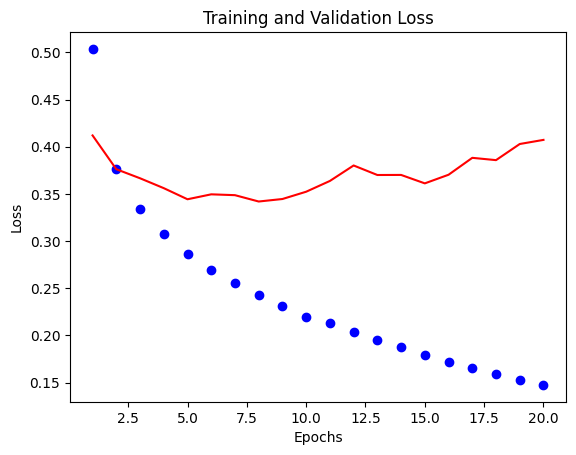

In [71]:
plot_loss_curves(history)

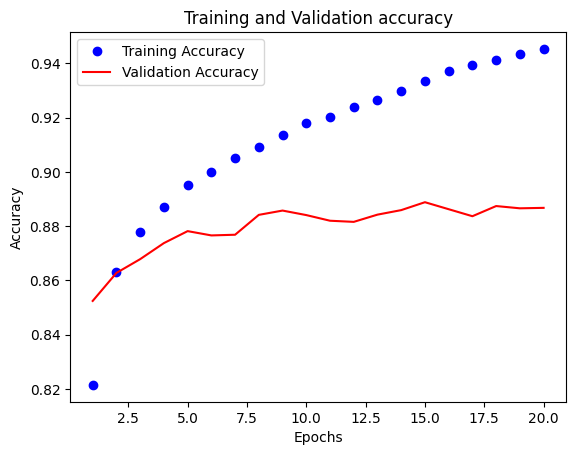

In [72]:
plot_acc_curves(history)

In [73]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8806 - loss: 0.4475


[0.4422062635421753, 0.8817999958992004]

##Two Dence Layers Model

In [79]:
input = keras.Input(shape=(28,28))
h = keras.layers.Flatten()(input)
h = keras.layers.Dense(256,activation="relu",name = "Hidden_1")(h)
h = keras.layers.Dense(256,activation="relu",name = "Hidden_2")(h)
output = keras.layers.Dense(10,activation="softmax",name = "Output")(h)
model = keras.Model(input,output)

In [80]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

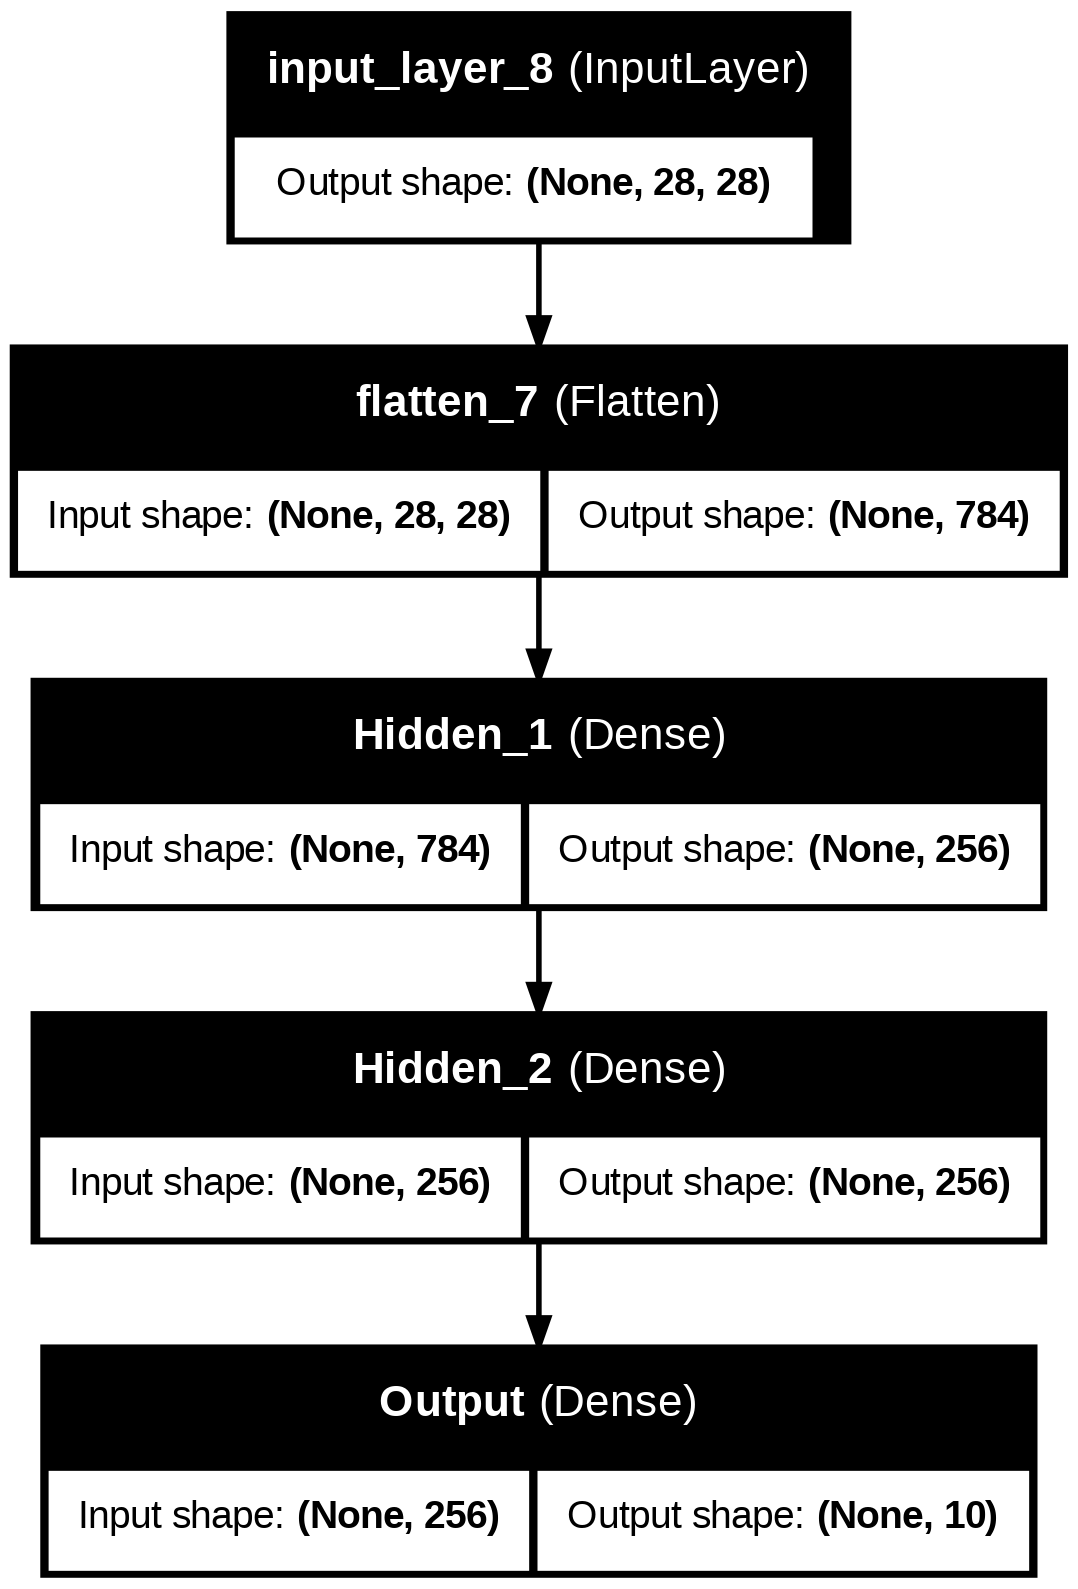

In [81]:
keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)

In [82]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [83]:
history2 = model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7893 - loss: 0.5943
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8648 - loss: 0.3663
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8786 - loss: 0.3272
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8866 - loss: 0.3021
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8920 - loss: 0.2836
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8991 - loss: 0.2675
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9048 - loss: 0.2526
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9079 - loss: 0.2436
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9109 - loss: 0.2306
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9160 - loss: 0.2216
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9200 - loss: 0.2100
Epoch 12/20
1875/18

In [85]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.5115


[0.5065383315086365, 0.8729000091552734]